In [1]:
import os
import io
import numpy as np
import fitz  # PyMuPDF
from PIL import Image

from decimer_segmentation import (
    segment_chemical_structures,
    segment_chemical_structures_from_file,
)

## Define pdf path and convert to image

Please uncomment according to the system you are using. 
If you are using Windows, make sure, poppler is installed properly.
On Linux and MacOS, this should work properly without any problems. 

#### Uncomment below according to your needs. 

In [2]:
from pathlib import Path
from PyPDF2 import PdfWriter, PdfReader


def pdf_extract(pdf, segments, together=False):
    """
    pdf: str | Path
    segments: [(start, end), {'start': int, 'end': int}]
    """
    pdf_writer = PdfWriter()
    with open(pdf, "rb") as read_stream:
        pdf_reader = PdfReader(read_stream)
        pdf_writer_segment = PdfWriter()
        for segment in segments:
            # support {'start': 3, 'end': 3} or (start, end)
            try:
                start_page, end_page = segment["start"], segment["end"]
            except TypeError:
                start_page, end_page = segment
            for page_num in range(start_page - 1, end_page):
                if together:
                    pdf_writer.add_page(pdf_reader.pages[page_num])
                else:
                    pdf_writer_segment.add_page(pdf_reader.pages[page_num])
            p = Path(pdf)
            if not together:
                ouput = p.parent / p.with_stem(
                    f"{p.stem}_pages_{start_page}-{end_page}"
                )
                with open(ouput, "wb") as out:
                    pdf_writer_segment.write(out)
    if together:
        ouput = p.parent / p.with_stem(f"{p.stem}_extracted")
        with open(ouput, "wb") as out:
            pdf_writer.write(out)


# path: str = os.path.abspath("./Validation/TW215080B.pdf")
path: str = os.path.abspath("./Validation/KR102075885B1.pdf")
pdf_extract(path, [(10, 20)])

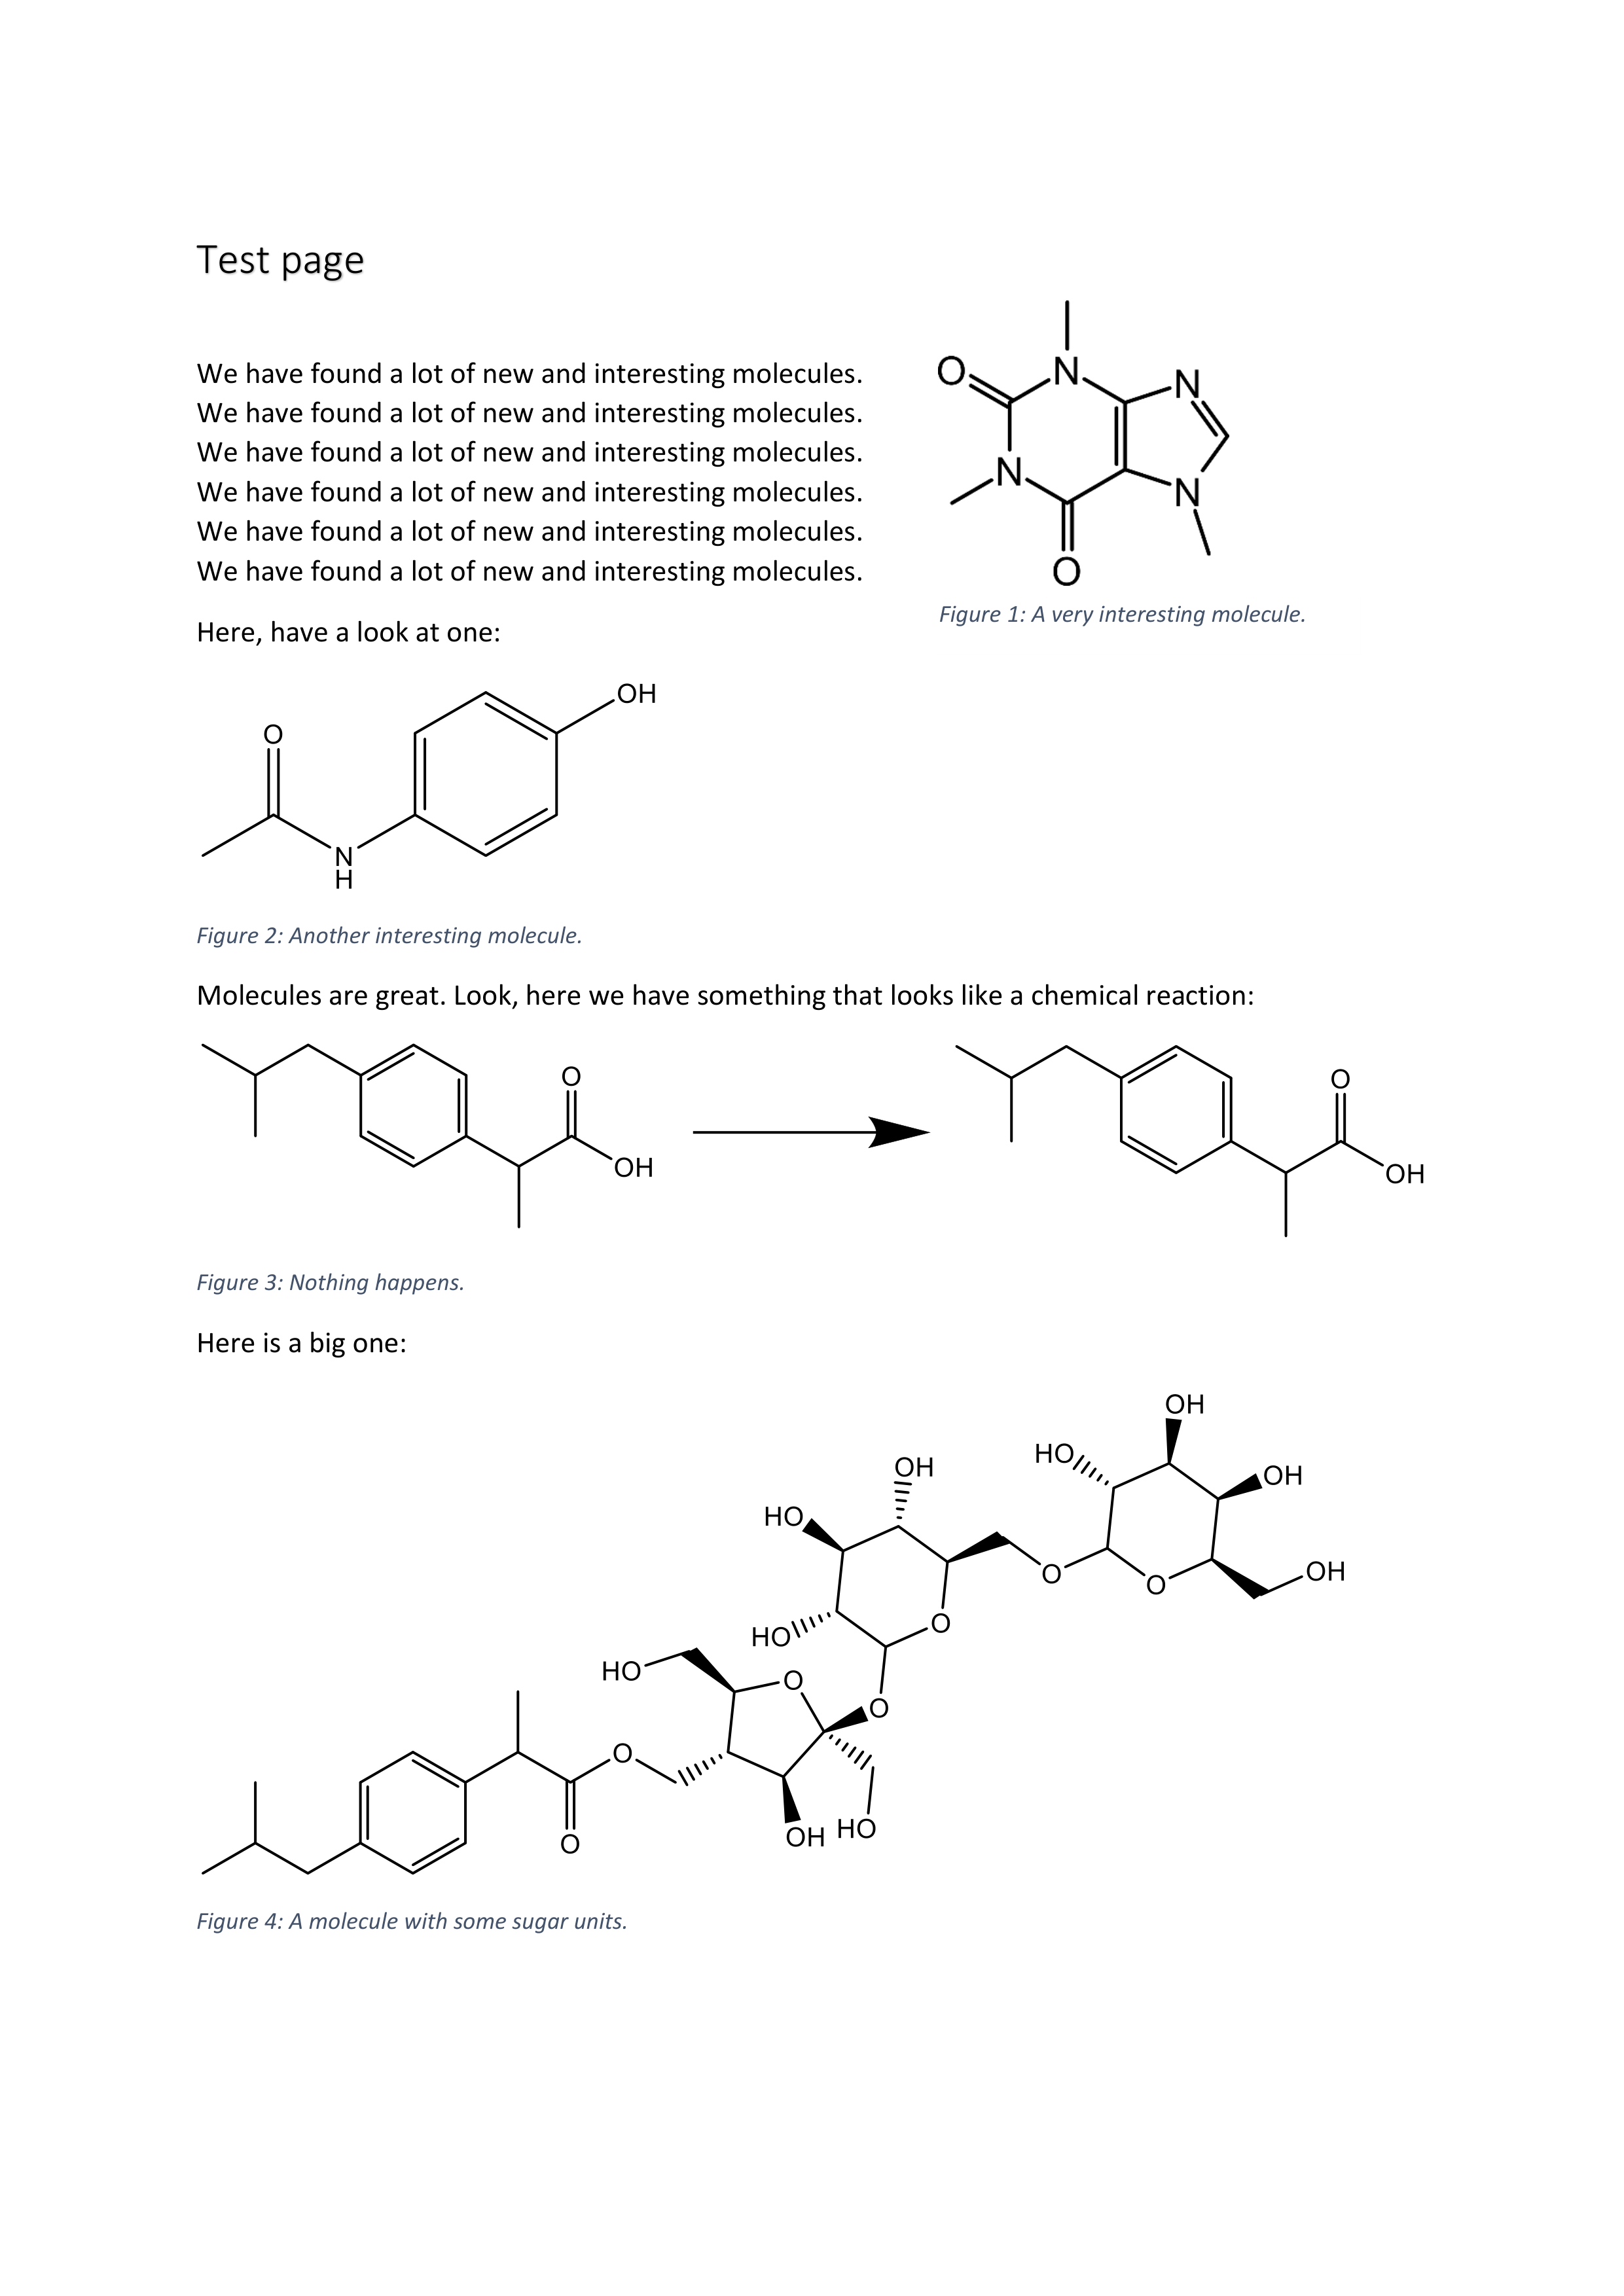

In [3]:
path: str = os.path.abspath("./Validation/test_page.pdf")
# path: str = os.path.abspath("./Validation/page 35.pdf")
# path: str = os.path.abspath("./Validation/TW215080B_pages_45-55.pdf")
# path: str = os.path.abspath("./Validation/KR102075885B1_pages_10-20.pdf")

# Convert PDF to images using PyMuPDF (no poppler installation needed!)
pdf_document = fitz.open(path)
pages = []
for page_num in range(pdf_document.page_count):
    page = pdf_document[page_num]
    # Render page to image with 300 DPI
    pix = page.get_pixmap(matrix=fitz.Matrix(300 / 72, 300 / 72))
    img_data = pix.tobytes("ppm")
    # Convert to PIL Image
    img = Image.open(io.BytesIO(img_data))
    pages.append(img)
pdf_document.close()

# Display the page
pages[0] if pages else "No pages found"

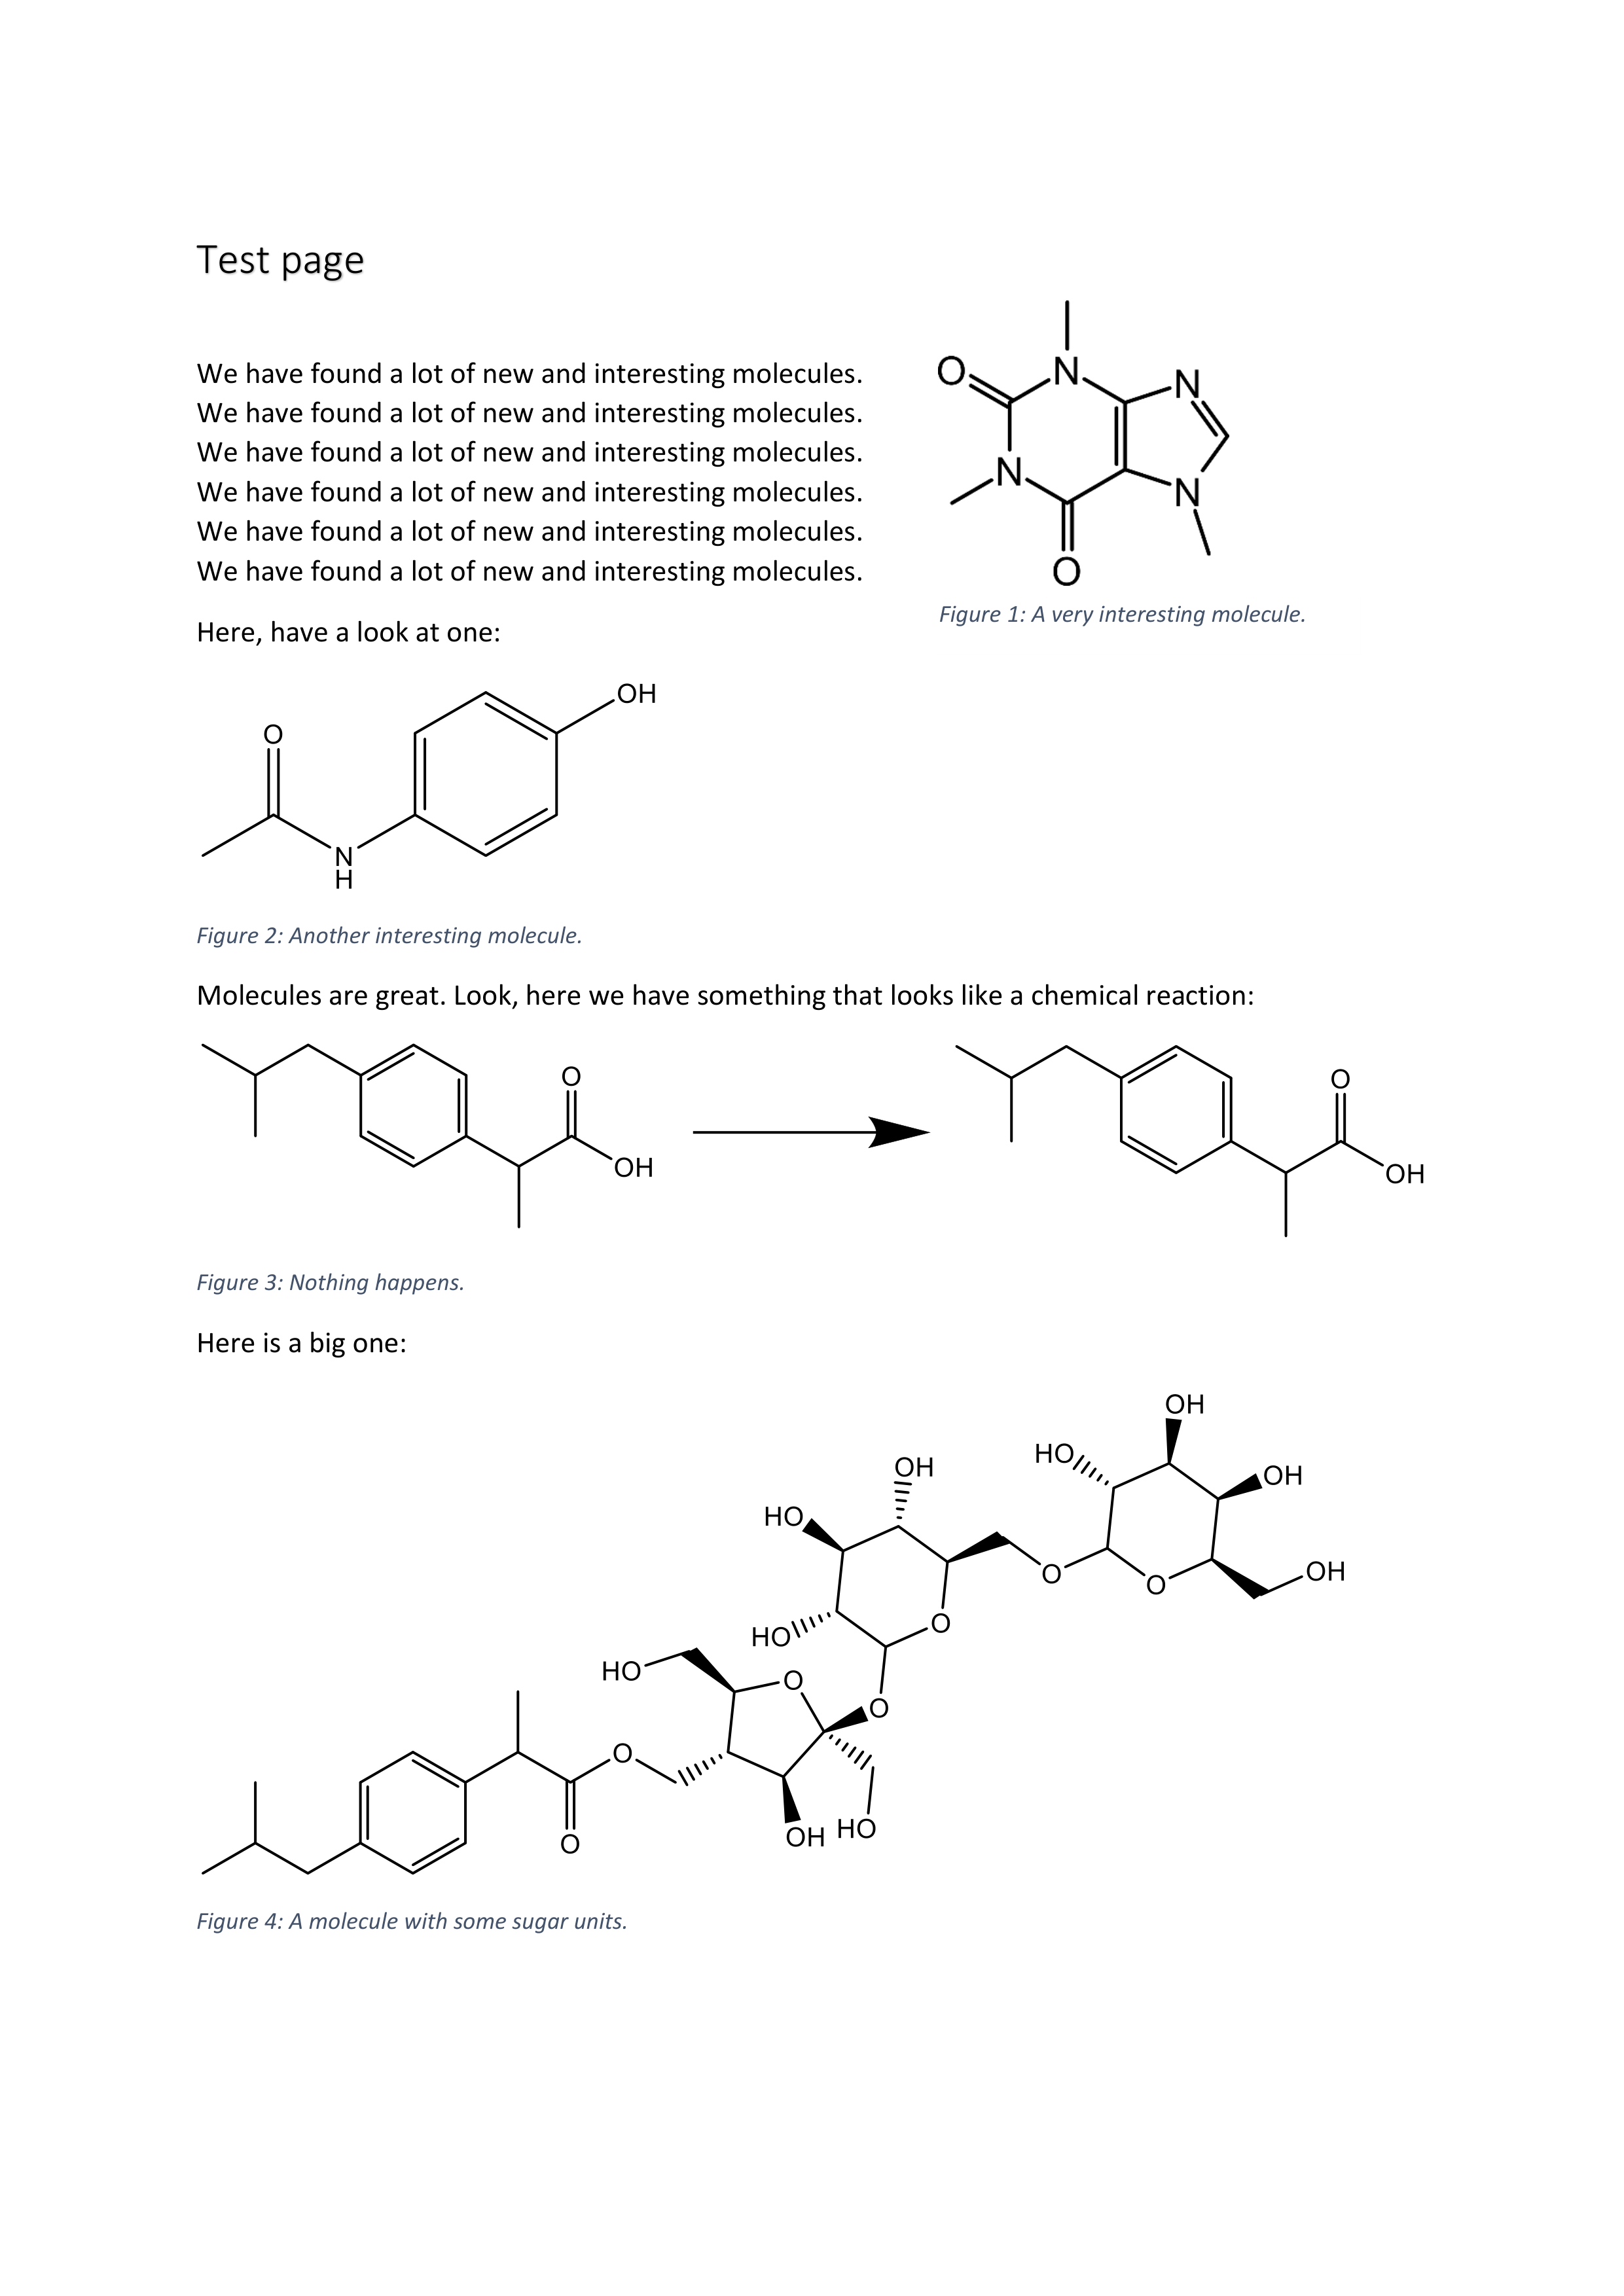

In [4]:
pages[0] if len(pages) > 0 else "No pages available"

## Run the detection using the Mask R CNN model

W0000 00:00:1749200797.640171       1 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "CropAndResize" attr { key: "T" value { type: DT_FLOAT } } attr { key: "extrapolation_value" value { f: 0 } } attr { key: "method" value { s: "bilinear" } } inputs { dtype: DT_FLOAT shape { dim { size: -45 } dim { size: 256 } dim { size: 256 } dim { size: 256 } } } inputs { dtype: DT_FLOAT shape { dim { size: -19 } dim { size: 4 } } } inputs { dtype: DT_INT32 shape { dim { size: -19 } } } inputs { dtype: DT_INT32 shape { dim { size: 2 } } value { dtype: DT_INT32 tensor_shape { dim { size: 2 } } int_val: 7 } } device { type: "CPU" model: "0" frequency: 2400 num_cores: 10 environment { key: "cpu_instruction_set" value: "ARM NEON" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 16384 l2_cache_size: 524288 l3_cache_size: 524288 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { dim { size: -19 } dim { size: 7 } dim { size: 7 } dim { size: 256 } } }
W0000 00:00:

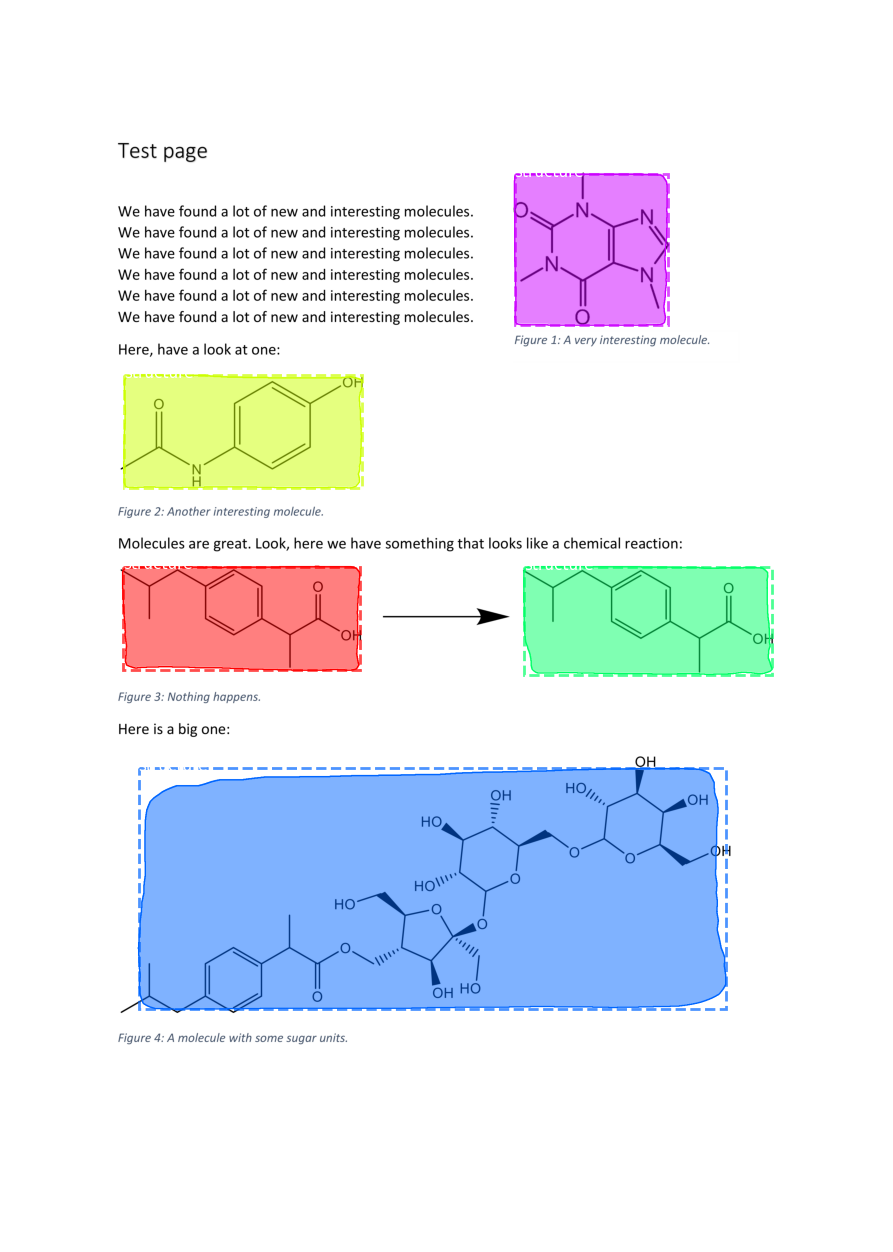

In [5]:
segments = segment_chemical_structures(
    np.array(pages[0]), expand=False, visualization=True
)

## Run DECIMER Segmentation with the mask expansion


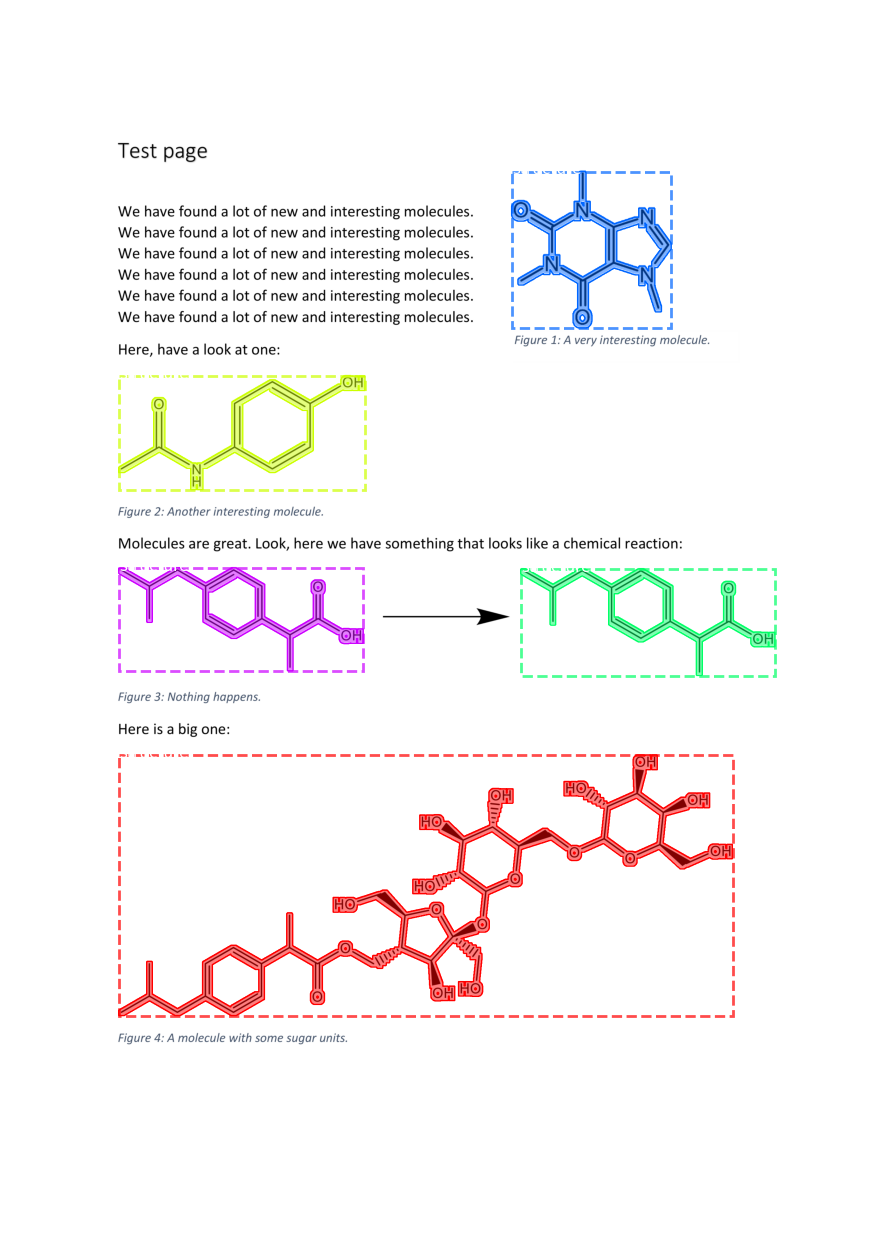

In [6]:
segments = segment_chemical_structures(
    np.array(pages[0]), expand=True, visualization=True
)

## Run DECIMER Segmentation directly on a file

With PyMuPDF, no poppler installation is required! The poppler_path argument is now deprecated and will be ignored.

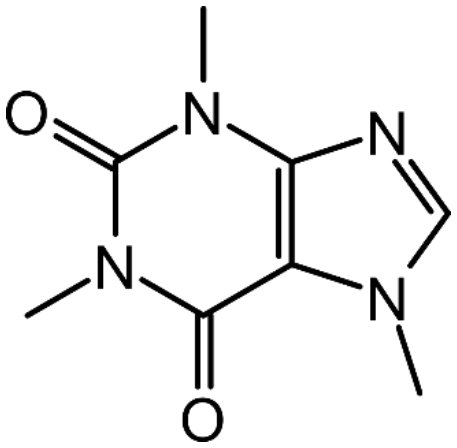

In [7]:
path = os.path.abspath("./Validation/test_page.pdf")
# poppler_path is now deprecated with PyMuPDF - no longer needed!
segments = segment_chemical_structures_from_file(path, expand=True)
# Show first segment
Image.fromarray(segments[0]) if segments else "No segments found"